<a id='top'></a>

In [37]:
using Plots
using LaTeXStrings

# Lecture 4: Solving nonlinear equations in 1d

<div style='background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;'><strong>Note.</strong>  This chapter will be mainly based on Chapter 1 of An Introduction to Numerical Analysis by Suli, Mayers. These notes are mainly a record of what we discussed and are not a substitute for attending the lectures and reading books! If anything is unclear/wrong, let me know and I will update the notes.
 </div> 

<div style="background-color: #ffe0b2; padding: 10px; border-left: 5px solid #ff9800;">
    <strong>Note:</strong> 
These notes contain some (but not all) of the content of the lecture. Please let me know if there are any additions that you feel are particularly important and let me know if you find any errors. 
</div>

## Last time: 

<div class='alert alert-block alert-danger'><b>⚠ Subtractive cancellation</b> 

When adding or subtracting numbers so that the result is much smaller in magnitude. 

Example 1: We know $x = -1.0000000000000000000147$ to $23$ significant digits but $x + 1 = -1.47 \times 10^{-20}$ to only $3$ significant digits  

Example 2: Quadratic formula when $-b \approx \pm \sqrt{b^2-4ac}$  

Example 3: $f(x) = \frac{e^x - 1}{x}$ vs $p(x) = 1 + \frac{x}{2!} + \frac{x^2}{3!} + \dots + \frac{x^8}{9!}$

...
</div> 

Relative condition number:

\begin{align}
    \kappa_f(x) &= ... = \left| \frac{x f'(x)}{f(x)} \right|
\end{align}

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

If the condition number is large, we say the problem is *ill-conditioned* or the problem is badly conditioned    
When the error can not be explained by an ill-conditioned problem, we will say the algorithm is *unstable*.</div> 

## Chapter 2

* Aim: for $f: [a,b] \to \mathbb R$, solve $f(\xi) = 0$ for $\xi \in \mathbb R$, 
* Also, can find $\xi$ such that $f(\xi) = c$ (by considering $x \mapsto f(x) - c$) or stationary points (by considering $f = F'$),
* Change of sign theorem. Converse is not true
* Can rewrite as $g(x) = x$ (in multiple ways)
* Brouwer's fixed point theorem

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Solve $f(x) = x$ where $f(x) := e^x - 2x - 1$.   
Apply change of sign theorem to $f$ to conclude there exists $\xi \in [1,2]$ such that $f(\xi) = 0$.
</div> 

In [38]:
# definitions for the example f(x) = e^x - 2x - 1

function simple_iteration( g, x1, N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        end
    end
    return x
end

f = x -> exp(x) - 2*x - 1;
g = x -> log( 2*x + 1 );    
h = x -> (exp(x) - 1)/2;
id = x -> x;

f_prime = x -> exp(x) - 2;
f_2prime = x -> exp(2);
g_prime = x -> 2/( 2*x + 1);

ξ = simple_iteration(g, 1.0, 100, 1e-15)[end];
ζ = 0.0;

(f(1), f(2)) = (-0.2817181715409549, 2.3890560989306504)


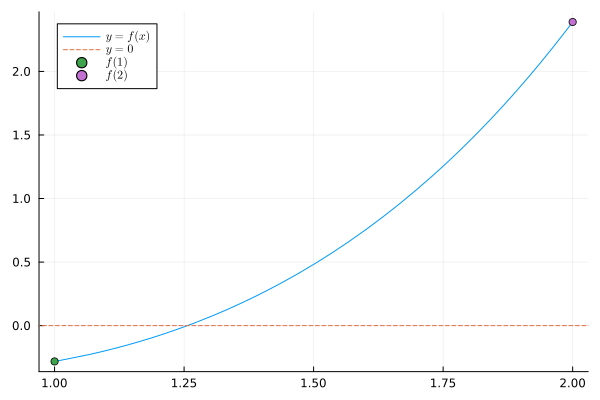

In [39]:
@show ( f(1), f(2) )
plot( f, 1, 2, label=L"y = f(x)" )
hline!([0], label=L"y = 0", linestyle=:dash)
scatter!( [1 2], [f(1) f(2)] , label=[L"f(1)" L"f(2)"]) 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

We could solve $f(x) = 0$ by instead considering the fixed point problems $g(x) = x$ or $h(x) = x$ where

\begin{align}
    g(x) = \log( 2x + 1 ), \quad  \text{and} \quad h(x) = \frac{e^x - 1}{2}
\end{align}

Brouwer's fixed point theorem applies to $g$ but **not** $h$ on $[1,2]$:
</div> 

(g(1), g(2)) = (1.0986122886681098, 1.6094379124341003)
(h(1), h(2)) = (0.8591409142295225, 3.194528049465325)


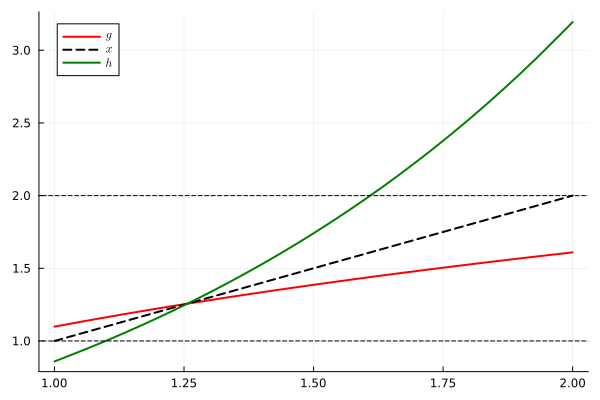

In [40]:
@show (g(1), g(2));
@show (h(1), h(2));

plot( [g, id, h], 1, 2, 
    label=[L"g" L"x" L"h"], lw=2,
    color=["red" "black" "green"], linestyle=[:solid :dash :solid] )
hline!( [1,2], linestyle=:dash, primary=false, color="black" )

* Lemma: if $(x_{n}) \to \xi$ then $\xi$ is a fixed point of $g$. Proof: Use the fact that $x_{n+1}\to \xi$ and $g$ is continuous so $g(x_n)\to g(\xi)$.

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

Returning to $f(x) = e^x - 2x - 1$, do the iterative methods $x_{n+1} = g(x_n)$ and $y_{n+1} = h(y_n)$ converge for $x_1 = y_1 = 1$?

 </div> 

In [41]:
x = simple_iteration( g, 1e-3, 22 )

22-element Vector{Float64}:
 0.001
 0.001998002662673058
 0.0039880425020066826
 0.007944444173298813
 0.0157639813122604
 0.031041161862191746
 0.060231437446657
 0.11374188108461382
 0.2049663522236682
 0.3435419759087765
 0.5230015662957427
 0.7158881986091449
 0.8886220179437329
 1.0214590819888538
 1.1128169773483771
 1.1711295060291513
 1.206646929282068
 1.2276777660025902
 1.2399253555448633
 1.2469893937540422
 1.251041140573826
 1.25335772906099

[ Info: Saved animation to c:\Users\jack6\Math 5485\simple_iteration_stable.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\simple_iteration_stable.gif")
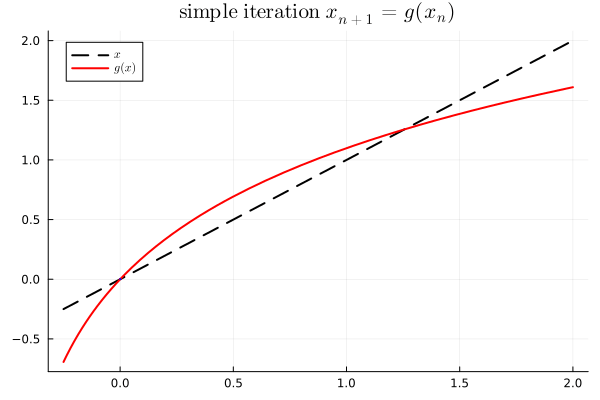

In [42]:
plot( [id, g] , min(-0.25,x[1]-1e-3), max(2,x[1]+1e-3), 
    label=[ L"x" L"g(x)"], title=L"\textrm{simple~iteration~} x_{n+1} = g(x_{n})",
    color=["black" "red"], linestyle=[:dash :solid], lw=2)

anim = @animate for n ∈ 2:2(length(x)-1)
    if (n%2 == 0)
        k = Int(n/2)
        plot!( [x[k], x[k]], [x[k], x[k+1]], 
            primary=false, lw=2, color="blue")
    else
        k = Int((n+1)/2)
        plot!( [x[k-1], x[k]], [x[k],x[k]], 
            primary=false, lw=2, color="blue")
    end
end
gif(anim, "simple_iteration_stable.gif", fps = 3)

In [43]:
y = simple_iteration( h, ξ-1e-2, 15 ); 

[ Info: Saved animation to c:\Users\jack6\Math 5485\simple_iteration_unstable.gif


Plots.AnimatedGif("c:\\Users\\jack6\\Math 5485\\simple_iteration_unstable.gif")
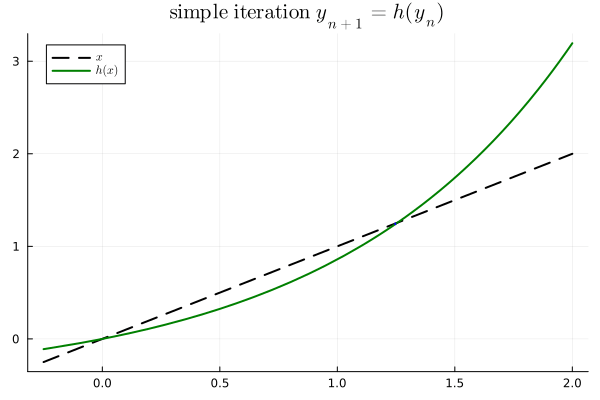

In [44]:
plot( [id, h] , min(-0.25,y[1]-1e-3), max(2,y[1]+1e-3), 
    label=[ L"x" L"h(x)"], title=L"\textrm{simple~iteration~} y_{n+1} = h(y_{n})",
    color=["black" "green"], linestyle=[:dash :solid], lw=2)

anim = @animate for n ∈ 2:2(length(y)-1)
    if (n%2 == 0)
        k = Int(n/2)
        plot!( [y[k], y[k]], [y[k], y[k+1]], 
            primary=false, lw=2, color="blue")
    else
        k = Int((n+1)/2)
        plot!( [y[k-1], y[k]], [y[k],y[k]], 
            primary=false, lw=2, color="blue")
    end
end
gif(anim, "simple_iteration_unstable.gif", fps = 3)

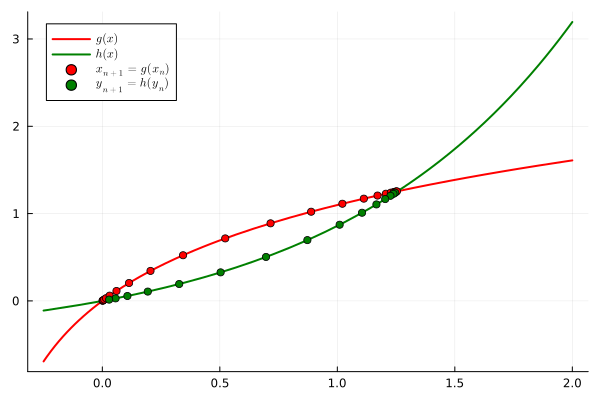

In [45]:
plot( [g, h] , -0.25, 2, 
    label=[ L"g(x)" L"h(x)"], color=["red" "green"], lw=2)
plot!( x, g.(x), seriestype=:scatter, label=L"x_{n+1} = g(x_n)" ,color="red")
plot!( y, h.(y), seriestype=:scatter, label=L"y_{n+1} = h(y_n)", color="green" )

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

Here, we see that $x_n \to \xi \approx 1.26 \in [1,2]$ but $y_{n} \to 0$ so the formulations $g(x) = x$ and $h(x) = x$ are equivalent, but they lead to different numerical methods.
 </div> 

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

Let $(x_n) \to \xi$. Suppose that there exist $\alpha\geq1$ and $\mu \geq 0$ such that

\begin{align}
    \lim_{n\to\infty}  \frac{\left|x_{n+1} - \xi\right|}{\left|x_n - \xi\right|^\alpha} = \mu
\end{align}

* If $\alpha = 1$ and $\mu \in (0,1)$, we say the convergence is *linear*,
* If $\alpha = 1$ but $\mu = 0$, we say the convergence is *superlinear* (i.e. faster than linear),
* If $\alpha = 1$ and $\mu = 1$, we say the convergence is *sublinear* (i.e slower than linear),
* If $\alpha = 2$, we say the convergence is *quadratic*,...

In the case where *(i)* $\alpha = 1, \mu \in (0,1)$ or *(ii)* $\alpha>1, \mu> 0$, we say
* $(x_n) \to \xi$ with *order* $\alpha$, 
* $\mu$ is the *asymptotic error constant*, and
* $\rho := - \log_{10} \mu$ is the *asymptotic rate of convergence*.

 </div> 

* Define the errors $e_n \coloneqq |x_{n}-\xi|$. Then, we have $e_{n+1} \approx \mu e_{n}^\alpha$,
* For linear convergence, $e_{n+N} \approx \mu^n e_N = 10^{-\rho n} e_N$ and so $\rho$ measures the number of decimal digits of accuracy gained in one iteration (for sufficiently large $N$)

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

Let's go back to our example: $f(x) = e^x - 2x - 1$. We have defined $g(x) = \log( 2x + 1 )$ and we are trying to solve the fixed point problem $g(x) = x$ (which is mathematically equivalent to $f(x) = 0$).

We have seen (numerically) that $x_{n+1} = g(x_n)$ with $x_1>0$ converges to $\xi = g(\xi) \approx 1.26$. What is the order of convergence? What is the asymptotic error constant? Asymptotic rate of convergence?
</div> 

In [46]:
function μ( x, ξ, α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

μ (generic function with 2 methods)

In [47]:
# this is e_{n+1}/e_{n} for n=1,...,14
μn = μ( x, ξ)
ρ = -log10( μn[end] );

μn

21-element Vector{Float64}:
 0.999205051893074
 0.99841359441868
 0.996841052928944
 0.9937367881169422
 0.9876863189309779
 0.97617878840982
 0.9552662983832602
 0.9201668651834529
 0.8682070800166984
 0.8034158099852159
 0.7370073130661621
 0.6804438941331454
 0.6388424557889528
 0.6111968825113593
 0.5939641345990201
 0.5836258577310153
 0.5775606878797853
 0.5740478904522482
 0.5720282875181989
 0.5708720331145754
 0.5702116439591833

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'>

This quantity appears to converge to $\mu \in (0,1)$. Therefore, we have $(x_n) \to \xi$ linearly with asymptotic error constant $\mu$ and asymptotic rate of convergence $\rho$ where these constants are as follows:

</div> 

In [48]:
@show (ξ, μn[end], ρ);

(ξ, μn[end], ρ) = (1.2564312086261678, 0.5702116439591833, 0.24396391846186502)


<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff; margin-right:50px;'>

Next: we will now prove (mathematically) that $x_{n+1} = g(x_n)$ converges linearly with $\mu = |g'(\xi)|$. Our computed value of $\mu$ (after $15$ iterations) is close to this theoretical value: 

</div>    

In [49]:
@show g_prime( ξ )
@show μn[end]; 
abs( g_prime( ξ ) - μn[end] )

g_prime(ξ) = 0.5693362740816775
μn[end] = 0.5702116439591833


0.000875369877505805

* Contraction: $g : [a,b] \to \mathbb R$ is a contraction if there exists $L \in (0,1)$ such that $|g(x)-g(y)|\leq L|x-y|$ for all $x,y \in [a,b]$,

<div class='alert alert-block alert-info'><b>Contraction Mapping Theorem (Banach fixed point theorem).</b> 

Suppose $g:[a,b] \to[a,b]$ is a contraction. Then, there exists a unique fixed point $\xi = g(\xi) \in [a,b]$. Moreover, the iteration $x_{n+1} = g(x_n)$ converges to $\xi$ for all $x_1 \in [a,b]$

 </div> 

<div class='alert alert-block alert-success'><b>Proof.</b> 

By Brouwer's fixed point theorem ($g:[a,b] \to [a,b]$ is continuous), there exists a fixed point $\xi \in [a,b]$. If $\zeta$ is another fixed point, then there exists $L \in (0,1)$ such that

\begin{align}
    |\xi - \zeta| &= |g(\xi) - g(\zeta)| 
    \tag{as $\zeta = g(\zeta)$}\nonumber\\ 
    %
    &\leq L |\xi - \zeta| 
    \tag{as $g$ is a contraction} 
\end{align}

That is, $0 \leq (1-L) |\xi - \zeta| \leq 0$ and so $\xi = \zeta$. i.e. $\xi$ is unique.

Defining $x_{n+1} = g(x_n)$ for $x_1 \in [a,b]$, we have 

\begin{align}
    |x_{n+1} - \xi| &= |g(x_n) - g(\xi)| \nonumber\\
    %
    &\leq L |x_{n} - \xi| \nonumber\\
    %
    &\leq L^n |x_1 - \xi|.
\end{align}

Since $L \in (0,1)$, we have $L^n \to 0$ as $n \to \infty$ and thus $(x_n) \to \xi$.
 </div> 

<div class='alert alert-block alert-danger'><b>Remark.</b> 

Notice that, by the mean value theorem, there exists $\eta_n$ between $x_{n}$ and $\xi$ for which  

\begin{align}
    \frac
        {|x_{n+1} - \xi|}
        {|x_n - \xi|}
    %
    &= \frac
        {|g(x_n) - g(\xi)|}
        {|x_n - \xi|} \nonumber\\
    %
    &= \frac
        {|g'(\eta_n)| |x_n - \xi|}
        {|x_n - \xi|} \nonumber\\
    %
    &= |g'(\eta_n)|.
\end{align}

Therefore, since $(x_n) \to \xi$, and $\eta_n$ is between $x_n$ and $\xi$, we have 

\begin{align}
    \lim_{n\to\infty}
    \frac
        {|x_{n+1} - \xi|}
        {|x_n - \xi|}
    %
    &= |g'(\xi)|
\end{align}

and the order of convergence is at least linear with asymptotic error constant $\mu = |g'(\xi)|$.  

(Recal that, if $\mu = 0$, the order of convergence is superlinear)

 </div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

Show that $g(x) = \log( 2x + 1 )$ is a contraction on $[1,2]$ with $L = 2/3$.   
Therefore $x_{n+1} = g(x_n)$ converges for all $x_1 \in [1,2]$.


Answer: $g' \in [\frac23, \frac25]$ on $[1,2]$ and so $g$ is a contraction with constant $L = \frac23$. Applying the contraction mapping theorem shows that $(x_n) \to \xi$ in this case.
 </div> 

* How many iterations to guarantee an error of $ \leq \epsilon$?

Recall that $|x_{n+1} - \xi| \leq L |x_{n} - \xi|$. In particular, we have $|x_1 - \xi| \leq |x_1 - x_2| + |x_2 - \xi| \leq |x_1 - x_2| + L|x_1-\xi|$ and thus $|x_1 - \xi| \leq \frac1{1-L} |x_1 - x_2|$. As a result, we have 

\begin{align}
    |x_{n+1} - \xi| &\leq L^n |x_1 - \xi| \nonumber\\
                    &\leq 
                    \frac
                        {L^n}
                        {1-L} 
                    |x_1 - x_2|
\end{align}

This number is less than $\epsilon$ when

\begin{align}
    n \geq \frac{ \log \frac{|x_1-x_2|}{\epsilon(1-L)}  }{\log\frac1L}.
\end{align}

This gives an upper bound on the number of iterations needed in order to be within some fixed tolerance.

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example.</strong> 

Back to $f(x) = e^x - 2x - 1$ written as the fixed point problem $g(x) = x$. For an error of $\epsilon = 10^{-10}$, we require around $54$ iterations. Actually, $40$ will do (but we have an upper bound): 
 </div> 

In [50]:
ϵ = 1e-10; 
L = 2/3;
x1 = 1; x2 = g(x1);
@show N = log( abs(x1-x2) / ( ϵ * (1-L) ) ) / log( 1/L )


x = simple_iteration( g, 1.0, 54, 1e-20)

abs( x[40] - ξ )

N = log(abs(x1 - x2) / (ϵ * (1 - L))) / log(1 / L) = 53.78490871074893


8.923284333661741e-11

<div style='background-color: #ddff99; padding: 10px; border-left: 5px solid #009933;'><strong>Definition.</strong> 

$\xi$ is a *stable fixed point of $g$* if the iteration $x_{n+1} = g(x_n)$ converges to $\xi$ for all $x_1$ sufficiently close to $\xi$  
$\xi$ is an *unstable fixed point of $h$* if for all $\delta > 0$ there exists $x_1 \in [\xi-\delta, \xi+\delta]$ for which $x_{n+1} = g(x_n)$ does not converge to $\xi$.

 </div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

$\xi = 1.26...$ is a stable fixed point of $g(x) = \log( 2x + 1 )$.  
Proof: contraction mapping theorem on $[1,2]$
 </div> 

* Theorem: Suppose $h(\xi) = \xi$ and $h'$ is continuous with $|h'| > L >  1$ near $\xi$. Then, $x_{n+1} = h(x_n)$ does not converge to $\xi$ for all $x_1 \not= \xi$. 

<div class='alert alert-block alert-success'><b>Proof.</b> 

Let $I_\delta = [\xi-\delta,\xi+\delta]$ be such that $|g'| > L$ on $I_{\delta}$. If $x_n \in I_{\delta}$ then there exists $\eta \in I_\delta$ such that

\begin{align}
    |x_{n+1} - \xi| &= |h(x_{n}) - h(\xi)| \nonumber\\
    %
    &=  |h'(\eta)| |x_n - \xi| \nonumber\\
    %
    &> L |x_{n} - \xi|.
\end{align}

Similarly, if $x_{n+1} \in I_\delta$, then $|x_{n+2} - \xi| > L^2|x_{n} - \xi|$. Since, $L> 1$ (and so $L^n\to\infty$ and $n\to\infty$), there exists $N$ such that $x_{n+N} \not\in I_{\delta}$. 

We have therefore seen that if $x_n \in I_\delta$, there exists $N$ such that $x_{n+N} \not\in I_{\delta}$. As a result, $(x_n)$ does not converge to $\xi$. 

</div> 

<div style='background-color: #cce0ff; padding: 10px; border-left: 5px solid #0066ff;'><strong>Example (cont.).</strong> 

$\xi = 1.26...$ is an unstable fixed point of $h(x) = \frac{e^x -1}{2}$. In fact, for $x_1 > \xi$, $x_{n+1}= h(x_n)$ diverges to infinity.   
$\zeta = 0$ is a stable fixed point of $h$. For $x_1 < \log 2$, $x_{n+1}= h(x_n)$ converges to $0$. 
 </div> 